In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
path = "C:\\Users\\John\\Desktop\\photoZ_visual\\PhotoZ_upgrades\\UnitTest1\\TestData\\"

image_version = "5-5"

height = 10

processed = np.genfromtxt(path + "Output-" + image_version + ".txt", delimiter = '\t')
raw = np.genfromtxt(path + "RLI-5.txt", delimiter = '\t')

raw_img = raw[:10240,1].reshape(height,-1)
processed_img = processed[:10240,1].reshape(height,-1)



print("Shaping:",height, 512 * 20 // height)

Shaping: 10 1024


<IPython.core.display.Javascript object>


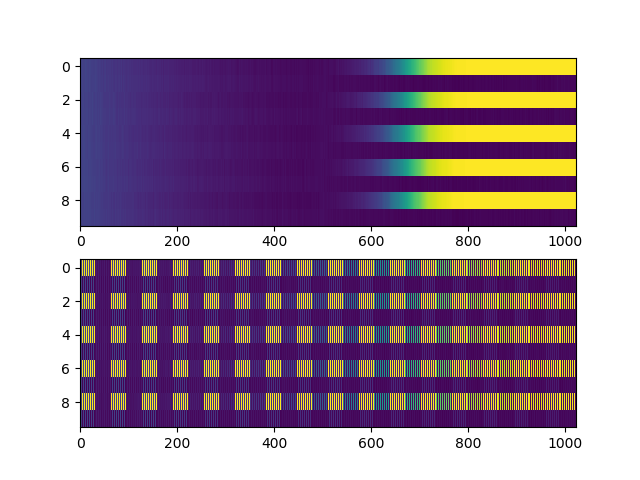

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.imshow(processed_img, aspect='auto')
ax2.imshow(raw_img, aspect='auto')
plt.show()
plt.savefig('readout-RLI-' + image_version + ".png")